# Data Visualization in Python 
## Author:  Yuxin Zhou, Siyu Duan


# 1. Introduction


Python and R are two most trending programming languages for data science. There are a lot of similiarities in these two languages.  However, transitions from a R user to a Python user in terms of ploting might not be easy due to varieties of ploting package.  This notebook aims to help R users to get familiar with Python plotting packages for basic plots. 

The dataset used in this notebook is mpg, which is a subset of fuel economy data from EPA (http://fueleconomy.gov).

In order to use the dataset, the following package needs installing first: !conda install -c conda-forge --yes plotnine

In [2]:
#import packages
from plotnine import *
from plotnine.data import *
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


## 2. Example: Bar Plot 

### 2.1 Using matplotlib

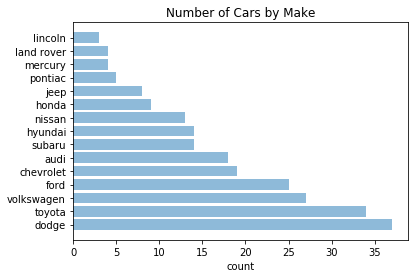

In [ ]:
make_count = mpg.manufacturer.value_counts().rename_axis('unique_values').reset_index(name='counts')

plt.barh(make_count.unique_values, make_count.counts, align='center', alpha=0.5)
plt.xlabel('count')
plt.title('Number of Cars by Make')

plt.show()

### 2.2 Using Pandas

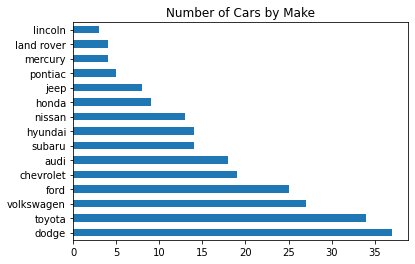

In [ ]:
df = mpg['manufacturer'].value_counts(sort=True)
ax = df.plot.barh().set_title('Number of Cars by Make')

### 2.3 Using Seaborn

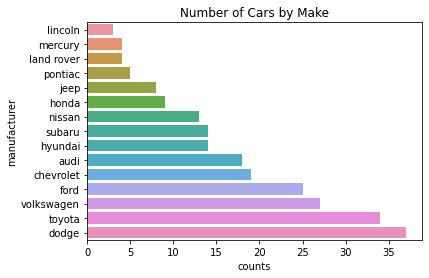

In [ ]:
make_count = mpg.manufacturer.value_counts().rename_axis('unique_values').reset_index(name='counts')

sns.barplot(x = make_count.counts,
            y = make_count.unique_values,
            data = mpg,
           order=make_count.sort_values('counts').unique_values)
plt.ylabel('manufacturer')
plt.title('Number of Cars by Make')

plt.show()


### 2.4 Using Plotnine 

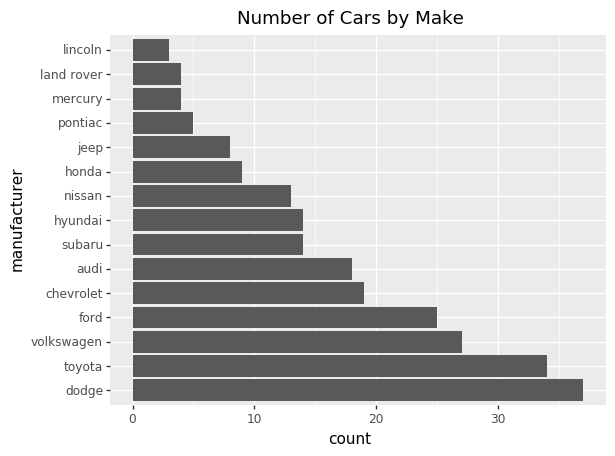

<ggplot: (7558177065)>

In [ ]:
mpg_copy = mpg.copy()
manufacturer_list = mpg['manufacturer'].value_counts().index.tolist()
manufacturer_cat = pd.Categorical(mpg['manufacturer'], categories=manufacturer_list)
mpg_copy = mpg_copy.assign(manufacturer_cat = manufacturer_cat)

ggplot(mpg_copy) + geom_bar(aes(x='manufacturer_cat')) + coord_flip() + ggtitle('Number of Cars by Make')+xlab('manufacturer')

### 2.5 Summary

If involving sorting categorical variables by their counts, bar plot using Pandas seems to be the best choice.  The built-in function, value_count, can sort data easily.  



## 3. Example: Scatter Plot


### 3.1 Using matplotlib

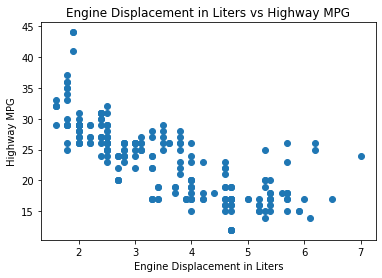

In [3]:
plt.scatter(x = 'displ', y = 'hwy', data=mpg)
plt.xlabel('Engine Displacement in Liters')
plt.ylabel('Highway MPG')
plt.title('Engine Displacement in Liters vs Highway MPG')
plt.show()

### 3.2 Using Pandas

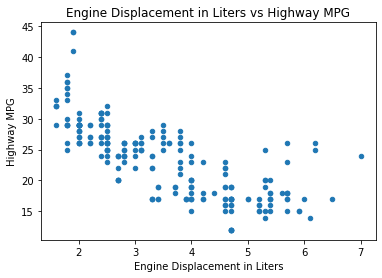

In [5]:
ax=mpg.plot.scatter(x='displ', y='hwy').set(title='Engine Displacement in Liters vs Highway MPG',
      xlabel='Engine Displacement in Liters',
      ylabel='Highway MPG')

### 3.3 Using Seaborn

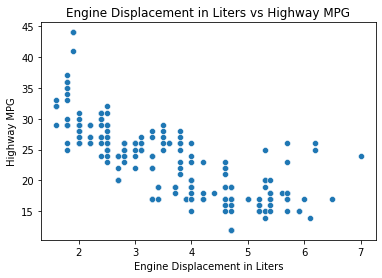

In [4]:
sns.scatterplot(data=mpg, x="displ", y="hwy")
plt.xlabel('Engine Displacement in Liters')
plt.ylabel('Highway MPG')
plt.title('Engine Displacement in Liters vs Highway MPG')
plt.show()

### 3.4 Using  plotnine

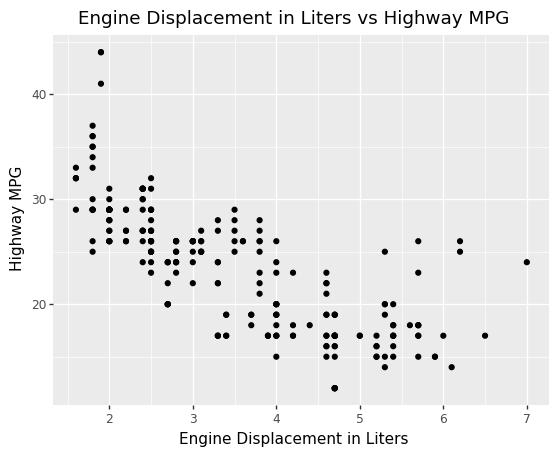

<ggplot: (7556888485)>

In [ ]:
ggplot(mpg) + geom_point(aes(x = 'displ', y = 'hwy')) + ggtitle('Engine Displacement in Liters vs Highway MPG') +xlab('Engine Displacement in Liters') +ylab('Highway MPG')

### 3.5 Summary
For ploting single x and y, 4 packages showed above work equally.  However, when it comes to ploting multiple variables with different layers, plotnine is a better choice because its syntax is very similiar to ggplot in R.  

## 4. Example: Histogram

### 4.1 Using  matplotlib

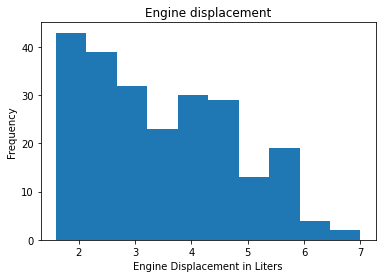

In [25]:
plt.hist('displ', bins=10, data=mpg)
plt.xlabel('Engine Displacement in Liters')
plt.ylabel('Frequency')
plt.title('Engine displacement')
plt.show()

### 4.2 Using Pandas

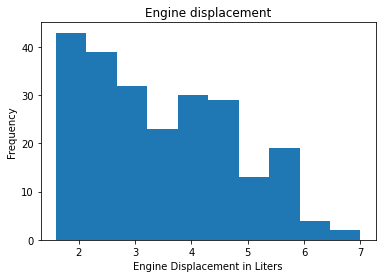

In [26]:
mpg['displ'].plot.hist(bins=10)
plt.xlabel('Engine Displacement in Liters')
plt.title('Engine displacement')
plt.show()

### 4.3 Using Seaborn

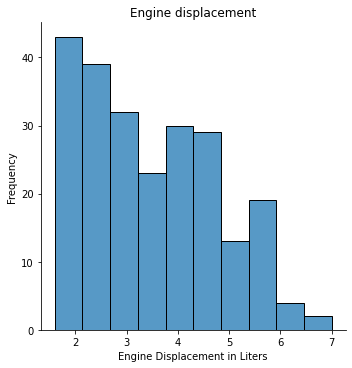

In [27]:
ax=sns.displot(mpg['displ'],kde=False, bins=10)
plt.xlabel('Engine Displacement in Liters')
plt.ylabel('Frequency')
plt.title('Engine displacement')
plt.show()

### 4.4 Using  plotnine

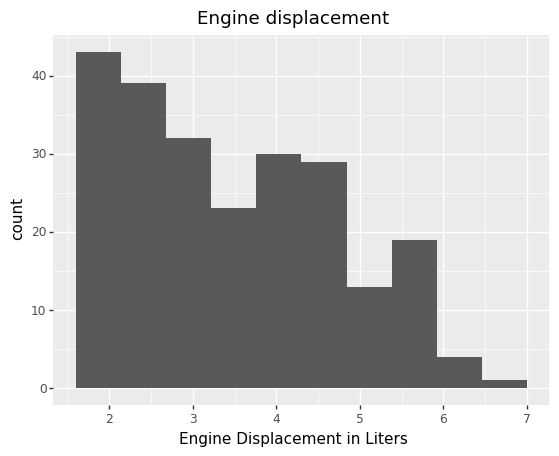

<ggplot: (8789246979655)>

In [28]:
ggplot(mpg) + geom_histogram(aes(x="displ"),bins=11,boundary = min(mpg.displ),closed="left")+\
ggtitle('Engine displacement')+xlab('Engine Displacement in Liters')

### 4.5 Summary
Histogram using different Python packages achieves similiar results. The algorithm of plotnine's binsize is different than other packages, and setting boundary to minimum is needed to get the same shape as other packages. 

## 5. Example: Boxplot

### 5.1 Using Matplotlib

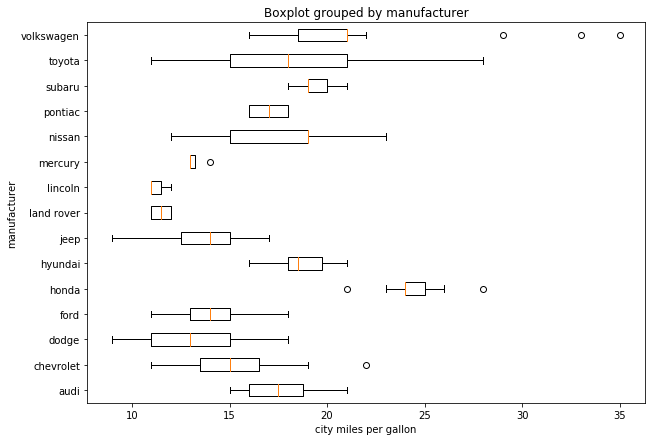

In [ ]:
mpg_copy = mpg.copy()
data = mpg_copy.groupby("manufacturer")["cty"].apply(list).reset_index(name='cty')
fig = plt.figure(figsize =(10, 7)) 
ax = fig.add_subplot(111) 
plt.boxplot(data.cty,vert=False)
ax.set_yticklabels(data.manufacturer) 
plt.xlabel("city miles per gallon")
plt.ylabel("manufacturer")
plt.title("Boxplot grouped by manufacturer")
plt.show()

### 5.2 Using Pandas

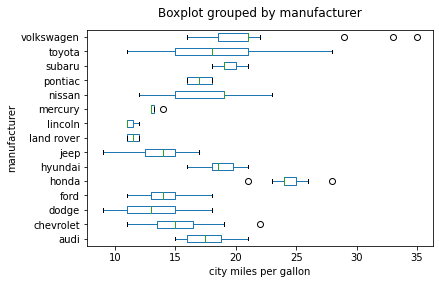

In [29]:
mpg_df = pd.DataFrame(mpg)
mpg_df.boxplot(by ='manufacturer', column ='cty', grid = False, vert=False)
plt.xlabel("city miles per gallon")
plt.ylabel("manufacturer")
plt.title("")
plt.show()

### 5.3 Using Seaborn

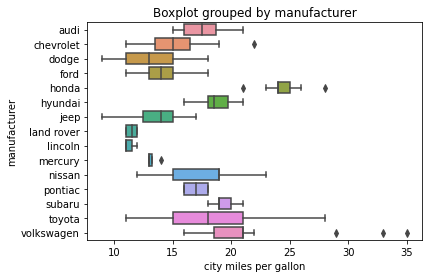

In [30]:
sns.boxplot(x="cty",y="manufacturer", data=mpg)
plt.xlabel("city miles per gallon")
plt.title("Boxplot grouped by manufacturer")
plt.show()

### 5.4 Using plotnine

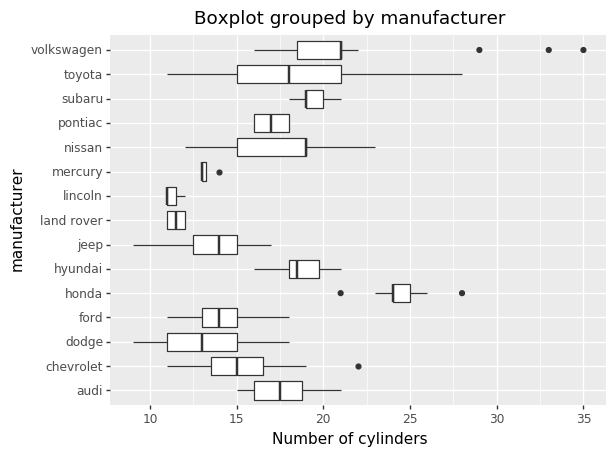

<ggplot: (7560180885)>

In [ ]:
ggplot(mpg) + geom_boxplot(aes(x = 'manufacturer', y = 'cty')) + coord_flip() +ylab('Number of cylinders') +ggtitle("Boxplot grouped by manufacturer")

### 5.5 Summary 
As for boxplot, matplotlib is the most difficult one among packages because reshaping data structure is needed. 

## 6. Example: Heatmap

### 6.1 Using  matplotlib

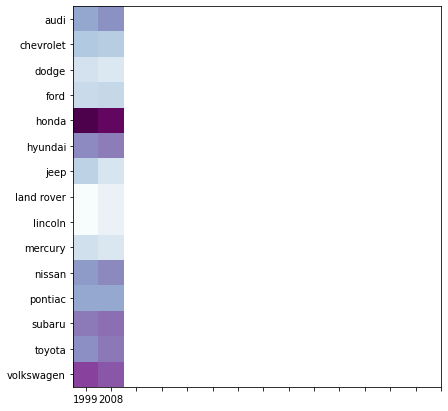

In [ ]:
mpg_heatmap = mpg.pivot_table('cty', index='manufacturer', columns='year')
fig = plt.figure(figsize =(10, 7))
plt.imshow(mpg_heatmap, cmap ="BuPu") 
plt.xticks(range(len(mpg_heatmap)), mpg_heatmap.columns) 
plt.yticks(range(len(mpg_heatmap)), mpg_heatmap.index)
plt.show() 

### 6.2 Using  Pandas

In [ ]:
mpg_heatmap = mpg.pivot_table('cty', index='manufacturer', columns='year')
mpg_heatmap.style.background_gradient(cmap ='BuPu').set_properties(**{'font-size': '18px'}) 


year,1999,2008
manufacturer,,
audi,17.111111,18.111111
chevrolet,15.142857,14.916667
dodge,13.375000,12.952381
ford,13.933333,14.100000
honda,24.800000,24.000000
hyundai,18.333333,18.875000
jeep,14.500000,13.166667
land rover,11.000000,12.000000
lincoln,11.000000,12.000000


### 6.3 Using Seaborn

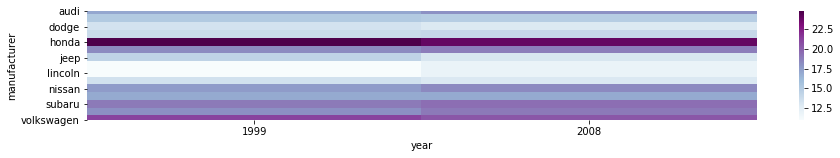

In [ ]:
mpg_heatmap = mpg.pivot_table('cty', index='manufacturer', columns='year')
fig = plt.figure(figsize=(15,2))
r = sns.heatmap(mpg_heatmap, cmap='BuPu')

### 6.4 Using plotnine

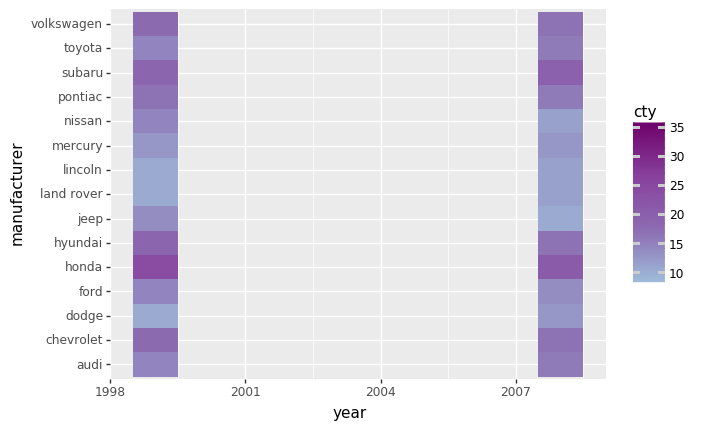

<ggplot: (7558297153)>

In [ ]:
ggplot(data = mpg, mapping = aes(x = 'year',y = 'manufacturer',fill = 'cty')) +\
geom_tile() +xlab("year")+scale_fill_gradientn(colors=['#9ebcda','#8c6bb1','#88419d','#6e016b'])

### 6.5 Summary
For heatmap, mpg dataset doesn't work well because there is only 2-year of data in this particular dataset.  Data matrix needs to be big in order to show patterns of clusters. 